# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [62]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [63]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: 
More rooms in a house means more required space to build the house which means the house is bigger. Hence, I would expect a home with higher 'RM' values to be worth more than houses with lower 'RM' values. **

**Higher 'LSTAT' values means more homeowners are lower class, so the homes must be cheaper. Hence, I would expect higher 'LSTAT' values to lead to homes that are worth less. **

**More  teachers in an area usually makes houses go up in price since teachers have income and can afford more expensive houses. Teachers might also be older and have a family, so they would want houses with more rooms, which raises the price of the house. Also, less teachers means poor schools, which indicates poor neighbourhoods. Since higher 'PTRATIO' means more students than teachers, I would expect homes to increase in value as the values of 'PTRATIO' decrease.**

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [64]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [65]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer: Yes, I would consider the model to have successfully captured the variation of the target variable, because, based on the definition of the R^2 score, the R^2 value is 0.923, which is very close to 1. This means that 92.3% of the variance in Y is predictable in X, so the model is very close to being able to correctly and accurately predict the dependent variable from the independent variable.**

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [66]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=15)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: When you find a model to fit some data, you can use your testing set data points to see how well the model works. You can then find the training and testing errors, and plot them on a learning curve. This learning curve will give clear information on how well the data set fits, meaning if the testing and training errors are both high (converge to a high point), then the model underfits, and if the testing error is high, and the training error is low (doesn't converge to a single point), then the model overfits. Doing this will ensure the model does not underfit or overfit, and ultimately help to find a model that is just right.**

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

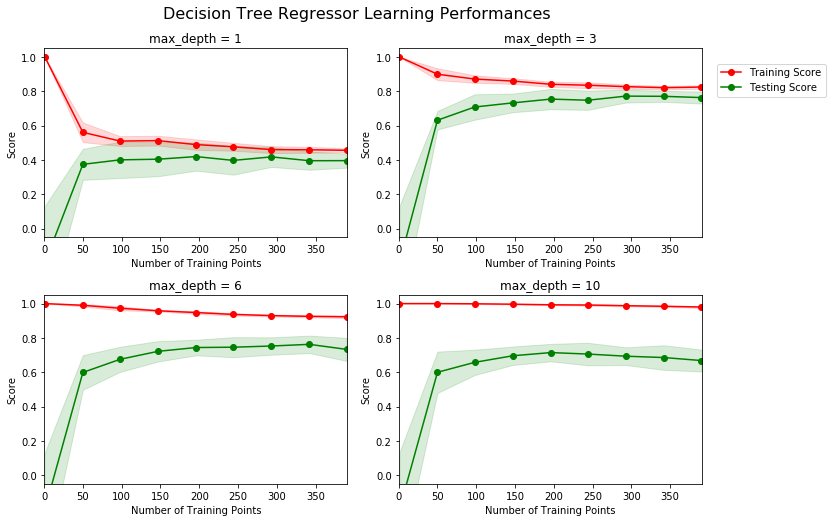

In [67]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: Looking at the second plot, with a maximum depth of 3: you can see that as more training points are added, both the training and testing curves seem to converge to the same point. This means this means that the model is either a high bias model or a good model, depending on the point of convergence. Since we are measuring against the score, the higher the point of convergence, the better the model, so, from the above 4 plots, the max depth of 3 plot has the highest point of convergence, so it would have the lowest point of convergence if we were measuring the error (on the y-axis) instead. Hence, the max depth of 3 model is the best model out of the above/given plots/models. **

**In principle (in regards to the model with a max depth of 3), increasing the number of training points would increase the testing score (hence, decrease the testing error), and make the model closer to the point of convergence, but even with large increases in training points, the testing score increases relatively little, such that it is a negligible difference, making the extra training points not very beneficial. However, if you were to increase the number of training points, the training score would not decrease very much either, so you could similarly ignore the difference. Essentially, increasing the number of training points would technically benefit the model in that it would decrease the testing error, but it would also hurt the model by increasing the error in the training score, however in general, these changes seem to be so small and insignificant, that it would most likely not be worth doing. **

**Also, increasing training points by adding more data (externally) is different from taking some testing points away from the testing set, and adding them to the training set, which could be worse because if the amount of testing points is too little, than you will not get a very accurate validation simply because the testing set is just not sufficiently large enough.**

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

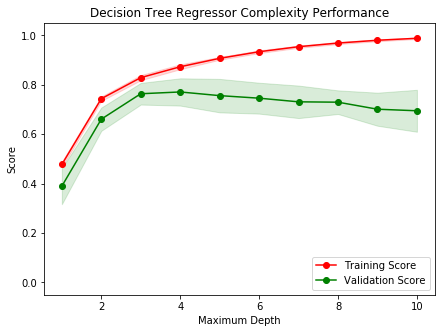

In [68]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: When the model is trained with a maximum depth of 1, it suffers from high bias, or underfitting, which can be seen by looking at the distance between both the training and validation points at the maximum depth of 1: Since this distance is small, but the points of the training and validation curves are the lowest score on the graph, it tells us that the error points are the highest for both the training and validation scores (because the greater the score the lower the error and vice versa), so this means that the model underfits. **

**When the maximum depth is 10, the model suffers from high variance, which can again be seen by looking at the distance between the points of the training and validation score curves at maximum depth of 10: Since the distance is the largest distance on the entire graph, and from looking at the previous points, it seems like it is getting larger when maximum depth increases, it tells us that the training and validation score curves will not converge to a single point, so the model overfits, or suffers from high variance.**


### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: I would say that the maximum depth 3 results in a model that best generalizes to the unseen data. It is the case because after this point of maximum depth, the distance between the points on both the training and validation score curves grows and continues to grow until it reaches maximum depth of 10, which we said to be a maximum depth that suffers from high variance. Hence -- starting at a maximum depth of 3 -- as the maximum depth increases, the model suffers more and more from high variance. However, as the maximum depth decreases from 3, meaning looking at the maxiumum depth of 1 and 2, you can see that the distance between the points of both the training and validation score curves are quite similar, but they also have a lower score, which means that they have higher training and validation errors, which means that they would suffer from underfitting. So, similarly -- starting at a maximum depth of 3 -- as the maximum depth decreases, the model suffers more and more from high bias. **

**Essentially, by looking at the complexity graph, I looked for the two points of the training and validation curves that have both the smallest distance between them, and also the highest score (meaning the least error), which implies that a model of max depth of 3 would be the best model.**

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: The grid search technique is a method to determine the best model that fits some data based on its' hyper parameters. It is and must be used when there are more than one hyper parameters (because if you only look at one hyper paramter, then you will not truly know if the model you have chosen is the best). For example, a Support Vector Machine has the kernel parameter, and the 'C' parameter. The 'grid' aspect of the technique is just a table that describes/showcases the multiple different possibilities of the combination of all hyper parameters. It looks at some way to measure how well the model fits (using some training and cross validation data), like the F1 score, and then picks that to be the best model (and then it tests the model with the testing data set to make sure it is a good one). The end goal of the method is to utilize all the hyper paramters to find the best possible model to fit the data. Hence, the grid search technique can be applied to a learning algorithm with more than one hyper parameter, to find the best model by checking the various combinations of the hyper parameter values.  **

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: The k-fold cross-validation technique is when you split your data into a number of subsets of data. The value, k, is defined to be the number of subsets of your data. Then, you choose one of your subsets of data, and let this be your testing set, and all the other data points from the other subsets will be your training set. Now you train your model with your chosen testing set like you normally would; however, after this is done you choose another subset of data to be your testing set, and train your model again. You repeat this procedure until every subset of data has been used to train the model, which means you will train your model k times. Finally, an average of all these results will be the final answer.  **

**(From the given document) An issue with the grid search technique is that you have to split the data into three different sets, one for the training set, testing set, and validation set. This can decrease the sample size of the data, which could affect how well the model can be learned, and depends randomly on the chosen data for the training and validation sets. k-fold cross-validation can fix this problem, because it will choose a multitude of different training and validation sets, and learn the model from each one of them, and then aveerage the results to give a more 'unbiased/balanced' answer (the unbiased aspect comes from the fact the the k-fold cross-validation technique does not use any data point as a testing data point more than once).**

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [69]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [70]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: The optimal model has a maximum depth of 4. In question 6, I said that the optimal model has a maximum depth of 3. This may be because of the different way we have implemented the cross validation technique here, which could have some effect on the result.**

**Both of these cross validation techniques are similar in that they use both randomize the data and use a chosen number of data points as the validation set; however, it seems like one main difference is that the k-fold cross validation technique does not reuse any data for the validation sets, but this ShuffleSplit cross validation method chooses the validation set without previously ruling out the data points that have already been used for previous validation sets.**

**Essentially, the random shuffling method for cross validation cannot gaurantee that the each validation set for each iteration will be different, but the liklyhood of this happening regardless goes up for larger data sets, and since the results for using both these cross validation techniques give the similar answers, it shows a good sign that the data set here is sufficiently large to use the shuffle split technique, but that it is likely the cause of the different answers. Hence, a maximum depth of 3 or 4 will both give a model close to or exactly like the most optimal model.**

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [71]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $417,789.47
Predicted selling price for Client 2's home: $197,152.94
Predicted selling price for Client 3's home: $935,900.00


**Answer: From the hint, and looking at the data, it seems like we can say that client 3 has the largest home (largest number of rooms), lowest neighbourhood poverty level, and lowest student-teacher ratio, which says that it should be the most expensive home out of these three clients. Similarly, client 2 has the smallest home (lowest number of rooms), greatest neighbourhood poverty level, and greatest student to teacher ratio, which says that it should be the cheapest home out of the three clients. Client 1 seems to be very much in the middle of these two clients, which you can see by averaging client 2 and client 3's data. For example: the neighbourhood poverty level of client 2 and client 3 are 32% and 3% respectively, and if you average these numbers, you get 17.5%, which is very close to client 1's neighbourhood poverty level, being 17%.**

**Using the results from the Data Exploration section, you make an estimation and say/recommend that client 2's home should be priced at around the minimum price, which means it should be roughly 100000. Similarly, client 3's home should be priced at around the maximum, so around 1000000. Finally, we can use the mean to estimate client 1's price, which comes out to be about 450000. **

**Now, using the optimized model to make these recommendations for the clients homes: client 1's home should be priced at 417789.47, client 2's home should be priced at 197145.94, and client 3's home should be priced at 9359000.00. All of these values are close to the predicted values based on the Data Exploration section, which is a good indcator that the model is solid. These values seem quite reasonable on their own, because: as described before, we expect client 3's home to be the most expensive, which it is, and it is also below the maximum price from the data. Similarly, client 2's home should be the cheapest, which it is, and it is above the minimum price from the data. Finally, client 1's home is expected to be somewhere in the middle and somewhat close to the average price of client's 2 and 3' home, which it is, but it is also close to both the average and median price from the data.**

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [72]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: Data collected from 1978 is still somewhat relavent today, as it can still give a general idea of the prices at the very least. Inflation in general can be adjusted for, as it is just the price (meaning it affects only one feature), so it is not too important (but still must be adjusted for). **

**The features in this data are decent enough to get a general idea, but more variables could be better. Total property, or square feet of the plot area can be important, for example: there are lots of houses with a large number of rooms, with a significantly small lawn/yard, and there are lots of houses with a large number of rooms with significantly large lawns/yards. The presence of a pool and quality of appliances in a house can make a home more expensive, but can also be predicted by the poverty level of the neighbourhood (poor neighbourhood indicates cheaper houses which indicates poor quality appliances and a lack of a pool), and so is already factored into the pricing predictions.**

**I would add a new, more general, feature that would be beneficial to the model, which could be something like utility. This feature would describe all three above mentioned features, and more, where it would essentialy be a generic measure of what can be used now or used in the future, and higher measures of utility mean higher housing prices. This could decribe a pool, like if it is already present, then the house should cost more, or if there is a lot of empty property, with enough space to build a pool, shed, or anything related, then the house should cost more. So in a special case, with a home with a large property but for whatever reason there is an inability to build anything like a pool or shed, the measure of utility would be lower, and hence the predicted price would be lower. Including many general features like these would be beneficial to the model to make it more accurate, while also not creating any large computational cost, which would come from an excessive amount of specific features.**

**If you look at the 10 trials above, and ignore trial 9, you see that all values are around and quite close to 400000. The range of prices now becomes about 30000, which less than half when you do consider trial 9. Only trial 9 is somewhat far away from this value, so since this model makes consistent predections 9/10 times, I would say it is robust enough to continually make consistent predictions, but it would be ideal to add a few more fine tuning features to make it consistent 10/10 times. (Also, making multiple predictions to get an average could help, or looking for and removing an outlier like trial 9 above would be beneficial).**

**Prices in rural cities for home and many other things are usually much different than urban cities like Boston, so I would not use this model to predict rural housing prices. You could use some rural housing data to find an average difference or trend in prices from rural houses to urban houses, and then use that difference to adapt our model to rural cities, but if you have rural data to begin with, you might as well just use the data to make a similar model and get seperate model for rural cities.**

**It is fair to judge a the price of an idividual home based on its neighbourhood, as the neighbourhood is usually an important factor of a house and whether or not someone will purchase it. Also, houses are usually similar to other houses in its neighbourhood, so characteristics of a neighbourhood is usually a very good way to predict a houses price. **

**In conclusion, I would say this model could be used in a real world setting just to get a good general idea for prices (except for rural areas), but in general it should not be, because the prices need to be adjusted for inflation. Also, I believe some fine tuning would be appropiate for the model, like adding a few more general features to make it closer to being 100% consistent. **

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.